In [2]:
# from transformers import Wav2Vec2Processor
from transformers import Wav2Vec2FeatureExtractor
from transformers import AutoModel
import torch
import torchaudio.transforms as T
from datasets import load_dataset

In [3]:
# loading our model weights
model = AutoModel.from_pretrained("m-a-p/MERT-v1-330M", trust_remote_code=True)
# loading the corresponding preprocessor config
processor = Wav2Vec2FeatureExtractor.from_pretrained("m-a-p/MERT-v1-330M",trust_remote_code=True)

# load demo audio and set processor
dataset = load_dataset("hf-internal-testing/librispeech_asr_demo", "clean", split="validation")
dataset = dataset.sort("id")
sampling_rate = dataset.features["audio"].sampling_rate

resample_rate = processor.sampling_rate
# make sure the sample_rate aligned
if resample_rate != sampling_rate:
    print(f'setting rate from {sampling_rate} to {resample_rate}')
    resampler = T.Resample(sampling_rate, resample_rate)
else:
    resampler = None

# audio file is decoded on the fly
if resampler is None:
    input_audio = dataset[0]["audio"]["array"]
else:
  input_audio = resampler(torch.from_numpy(dataset[0]["audio"]["array"]).float())

inputs = processor(input_audio.float(), sampling_rate=resample_rate, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs, output_hidden_states=True)

Explicitly passing a `revision` is encouraged when loading a configuration with custom code to ensure no malicious code has been contributed in a newer revision.
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.
Found cached dataset librispeech_asr_demo (/home/pab/.cache/huggingface/datasets/hf-internal-testing___librispeech_asr_demo/clean/2.1.0/d3bc4c2bc2078fcde3ad0f0f635862e4c0fef78ba94c4a34c4c250a097af240b)


setting rate from 16000 to 24000


In [13]:
all_layer_hidden_states = torch.stack(outputs.hidden_states).squeeze()
print(all_layer_hidden_states.shape) # [25 layer, Time steps, 1024 feature_dim]

torch.Size([25, 438, 1024])


In [14]:
from matplotlib import pyplot as plt

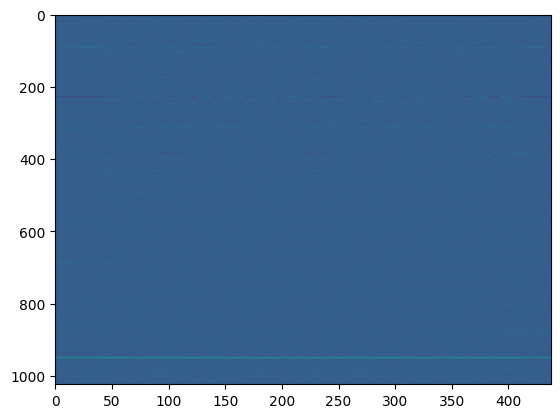

In [16]:
avg = all_layer_hidden_states.mean(0)
plt.imshow(avg.T, aspect='auto')
plt.show()